In [1]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
To update, run: python.exe -m pip install --upgrade pip

In [1]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for walkable routes)
G = ox.graph_from_polygon(admin_poly, network_type='walk')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

Number of intersections:  97610
Number of road segments: 265132


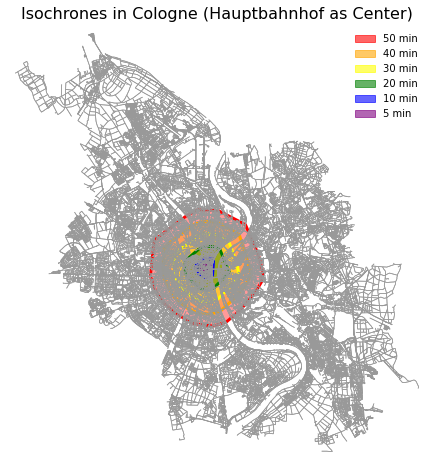

In [3]:
# Define the walking speed (5 km/h -> 1.39 m/s)
walking_speed = 1.39  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / walking_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append(gpd.GeoSeries([polygon]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Plot the isochrones
for idx, (polygon, time) in enumerate(reversed(list(zip(isochrone_polys, isochrone_times)))):
    polygon.plot(ax=ax, color=colors[idx], alpha=0.4, label=f'{time} min')
    polygon.plot(ax=ax, color='none', edgecolor=colors[idx], linewidth=3)

# Manually create legend handles
handles = [mpatches.Patch(color=colors[idx], alpha=0.6, label=f'{time} min') for idx, time in enumerate(reversed(isochrone_times))]

# Plot the network
ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=0.7, show=False)

# Add the legend to the plot and set the title
ax.set_title('Isochrones in Cologne (Hauptbahnhof as Center)', fontsize=16)
legend = plt.legend(handles=handles)
legend.get_frame().set_linewidth(0)  # Remove the legend box's frame

# Show the plot
plt.show()


In [4]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import folium
from folium import GeoJson

# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for walkable routes)
G = ox.graph_from_polygon(admin_poly, network_type='walk')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

# Define the walking speed (5 km/h -> 1.39 m/s)
walking_speed = 1.39  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / walking_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append(polygon)

# Create a Folium map centered at Cologne Hauptbahnhof
m = folium.Map(location=[center_point[0], center_point[1]], zoom_start=13)

# Add the isochrones to the map
colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#8B00FF']

for idx, (polygon, time) in enumerate(reversed(list(zip(isochrone_polys, isochrone_times)))):
    geo_json = gpd.GeoSeries([polygon]).__geo_interface__
    GeoJson(geo_json, style_function=lambda x, color=colors[idx]: {
        'fillColor': color,
        'color': color,
        'weight': 2,
        'fillOpacity': 0.4
    }).add_to(m)

# Add a marker for Cologne Hauptbahnhof
folium.Marker(
    location=[center_point[0], center_point[1]],
    popup='Cologne Hauptbahnhof',
    icon=folium.Icon(icon='train', prefix='fa')
).add_to(m)

# Display the map
m.save('cologne_isochrones.html')
print("Die interaktive Karte wurde als 'cologne_isochrones.html' gespeichert.")


Number of intersections:  97610
Number of road segments: 265132
Die interaktive Karte wurde als 'cologne_isochrones.html' gespeichert.


In [5]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import geopandas as gpd
import folium
from folium import GeoJson

# Define the polygon for Cologne (Köln)
admin_district = ox.geocode_to_gdf('Cologne, Germany')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx (for walkable routes)
G = ox.graph_from_polygon(admin_poly, network_type='walk')

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments:',  G.number_of_edges())

# Define the walking speed (5 km/h -> 1.39 m/s)
walking_speed = 1.39  # in meters per second

# Calculate travel time for each edge
for u, v, data in G.edges(data=True):
    data['travel_time'] = data['length'] / walking_speed

# Use Cologne Hauptbahnhof as the center node (geocoded)
center_point = (50.9422, 6.9577)  # Coordinates for Cologne Hauptbahnhof
center_node = ox.distance.nearest_nodes(G, X=center_point[1], Y=center_point[0])

# Define the isochrone times (in minutes)
isochrone_times = [5, 10, 20, 30, 40, 50]

# Generate isochrones
isochrone_polys = []
for time in isochrone_times:
    subgraph = nx.ego_graph(G, center_node, radius=time*60, distance='travel_time')

    # Create a convex hull polygon around the nodes within this subgraph
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    polygon = Polygon(gpd.GeoSeries(node_points).unary_union.convex_hull)
    isochrone_polys.append(polygon)

# Create a Folium map centered at Cologne Hauptbahnhof
m = folium.Map(location=[center_point[0], center_point[1]], zoom_start=13)

# Add the isochrones to the map
colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#8B00FF']

for idx, (polygon, time) in enumerate(reversed(list(zip(isochrone_polys, isochrone_times)))):
    geo_json = gpd.GeoSeries([polygon]).__geo_interface__
    GeoJson(geo_json, style_function=lambda x, color=colors[idx]: {
        'fillColor': color,
        'color': color,
        'weight': 2,
        'fillOpacity': 0.4
    }).add_to(m)

# Add a marker for Cologne Hauptbahnhof
folium.Marker(
    location=[center_point[0], center_point[1]],
    popup='Cologne Hauptbahnhof',
    icon=folium.Icon(icon='train', prefix='fa')
).add_to(m)

# Add a legend to the map
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 200px; height: 180px; 
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <b>Isochrone Times (minutes)</b><br>
    <i style="background:#FF0000; width:10px; height:10px; display:inline-block;"></i> 50 min<br>
    <i style="background:#FF7F00; width:10px; height:10px; display:inline-block;"></i> 40 min<br>
    <i style="background:#FFFF00; width:10px; height:10px; display:inline-block;"></i> 30 min<br>
    <i style="background:#00FF00; width:10px; height:10px; display:inline-block;"></i> 20 min<br>
    <i style="background:#0000FF; width:10px; height:10px; display:inline-block;"></i> 10 min<br>
    <i style="background:#8B00FF; width:10px; height:10px; display:inline-block;"></i> 5 min
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m.save('cologne_isochrones.html')
print("Die interaktive Karte wurde als 'cologne_isochrones.html' gespeichert.")


Number of intersections:  97610
Number of road segments: 265132
Die interaktive Karte wurde als 'cologne_isochrones.html' gespeichert.
